In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv(r"C:/Users/PICHAU/Downloads/SaoPaulo.csv")
df.head()

,Cidade,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportions,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km
0,Aguas da Prata,673,1705,5.066865,3.676543e+05,215.632995,2.797920,"{0: 0, 1: 121, 2: 2, 3: 445, 4: 103, 5: 1, 6: 1}","{0: 0,0, 1: 0,17979197622585438, 2: 0,00297176...",552,187971.136034,923,203.652368,1.154316,0.001083,4.107015,3.368607,2243.627793,1147.102905
1,Aguas de Lindoia,946,2281,4.822410,3.740328e+05,163.977562,2.704017,"{0: 0, 1: 172, 2: 2, 3: 707, 4: 64, 5: 1}","{0: 0,0, 1: 0,18181818181818182, 2: 0,00211416...",774,194232.621942,1267,153.301201,1.140079,0.002368,15.966823,13.063764,6313.018842,3278.306453
2,Aguas de Santa Barbara,1143,2701,4.726159,7.224873e+05,267.488825,2.879265,"{0: 0, 1: 173, 2: 7, 3: 749, 4: 213, 5: 1}","{0: 0,0, 1: 0,15135608048993876, 2: 0,00612423...",970,393851.337383,1633,241.182693,1.075026,0.001837,3.224547,2.736492,2038.227900,1111.104327
3,Agudos,1741,4615,5.301551,1.045045e+06,226.445298,3.010913,"{0: 0, 1: 203, 2: 8, 3: 1097, 4: 433}","{0: 0,0, 1: 0,11659965537047674, 2: 0,00459506...",1538,561213.869316,2607,215.271910,1.097473,0.000384,3.694732,3.263928,2217.783783,1191.002261
4,Alambari,608,1396,4.592105,4.066371e+05,291.287307,2.682566,"{0: 0, 1: 116, 2: 2, 3: 449, 4: 41}","{0: 0,0, 1: 0,19078947368421054, 2: 0,00328947...",492,224953.777572,807,278.753132,1.102652,0.001239,4.257993,3.445613,2847.792497,1575.413829


In [3]:
df=df.drop(columns=['n',
                    'm', 
                    'edge_length_total', 
                    'streets_per_node_counts', 
                    'streets_per_node_proportions', 
                    'intersection_count', 
                    'street_length_total', 
                    'street_segment_count',
                    'self_loop_proportion'
                   ])
df.head(10)

,Cidade,k_avg,edge_length_avg,streets_per_node_avg,street_length_avg,circuity_avg,node_density_km,intersection_density_km,edge_density_km,street_density_km
0,Aguas da Prata,5.066865,215.632995,2.797920,203.652368,1.154316,4.107015,3.368607,2243.627793,1147.102905
1,Aguas de Lindoia,4.822410,163.977562,2.704017,153.301201,1.140079,15.966823,13.063764,6313.018842,3278.306453
2,Aguas de Santa Barbara,4.726159,267.488825,2.879265,241.182693,1.075026,3.224547,2.736492,2038.227900,1111.104327
3,Agudos,5.301551,226.445298,3.010913,215.271910,1.097473,3.694732,3.263928,2217.783783,1191.002261
4,Alambari,4.592105,291.287307,2.682566,278.753132,1.102652,4.257993,3.445613,2847.792497,1575.413829
5,Alfredo Marcondes,5.431818,263.298751,2.882576,253.252828,1.112877,3.756519,3.158891,2686.269769,1351.348121
6,Altair,5.207921,500.124671,2.788779,478.201564,1.091387,1.463611,1.212430,1906.067071,960.919972
7,Altinopolis,5.035533,362.449667,2.765228,336.612442,1.112553,1.602582,1.309725,1462.458495,741.742660
8,Alto Alegre,5.086093,402.738491,2.799117,376.988789,1.069262,1.636545,1.365594,1676.120847,847.127011
9,Aluminio,4.868182,191.868078,2.690909,185.543465,1.126273,9.940007,7.861642,4642.225371,2458.372583


In [4]:
corr_mat = df.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,k_avg,edge_length_avg,streets_per_node_avg,street_length_avg,circuity_avg,node_density_km,intersection_density_km,edge_density_km,street_density_km
k_avg,0.000000,-0.049364,0.629090,-0.047776,-0.409918,-0.191311,-0.177828,-0.183151,-0.208520
edge_length_avg,-0.049364,0.000000,-0.422924,0.995841,0.512176,-0.523294,-0.517688,-0.560521,-0.556166
streets_per_node_avg,0.629090,-0.422924,0.000000,-0.453295,-0.719412,0.136259,0.163006,0.097668,0.124318
street_length_avg,-0.047776,0.995841,-0.453295,0.000000,0.530509,-0.510065,-0.505073,-0.545484,-0.541419
circuity_avg,-0.409918,0.512176,-0.719412,0.530509,0.000000,-0.271003,-0.284625,-0.246130,-0.262448
node_density_km,-0.191311,-0.523294,0.136259,-0.510065,-0.271003,0.000000,0.998529,0.979497,0.989984
intersection_density_km,-0.177828,-0.517688,0.163006,-0.505073,-0.284625,0.998529,0.000000,0.971900,0.987314
edge_density_km,-0.183151,-0.560521,0.097668,-0.545484,-0.246130,0.979497,0.971900,0.000000,0.991208
street_density_km,-0.208520,-0.556166,0.124318,-0.541419,-0.262448,0.989984,0.987314,0.991208,0.000000


In [5]:
corr_mat.abs().idxmax()

k_avg                         streets_per_node_avg
edge_length_avg                  street_length_avg
streets_per_node_avg                  circuity_avg
street_length_avg                  edge_length_avg
circuity_avg                  streets_per_node_avg
node_density_km            intersection_density_km
intersection_density_km            node_density_km
edge_density_km                  street_density_km
street_density_km                  edge_density_km
dtype: object

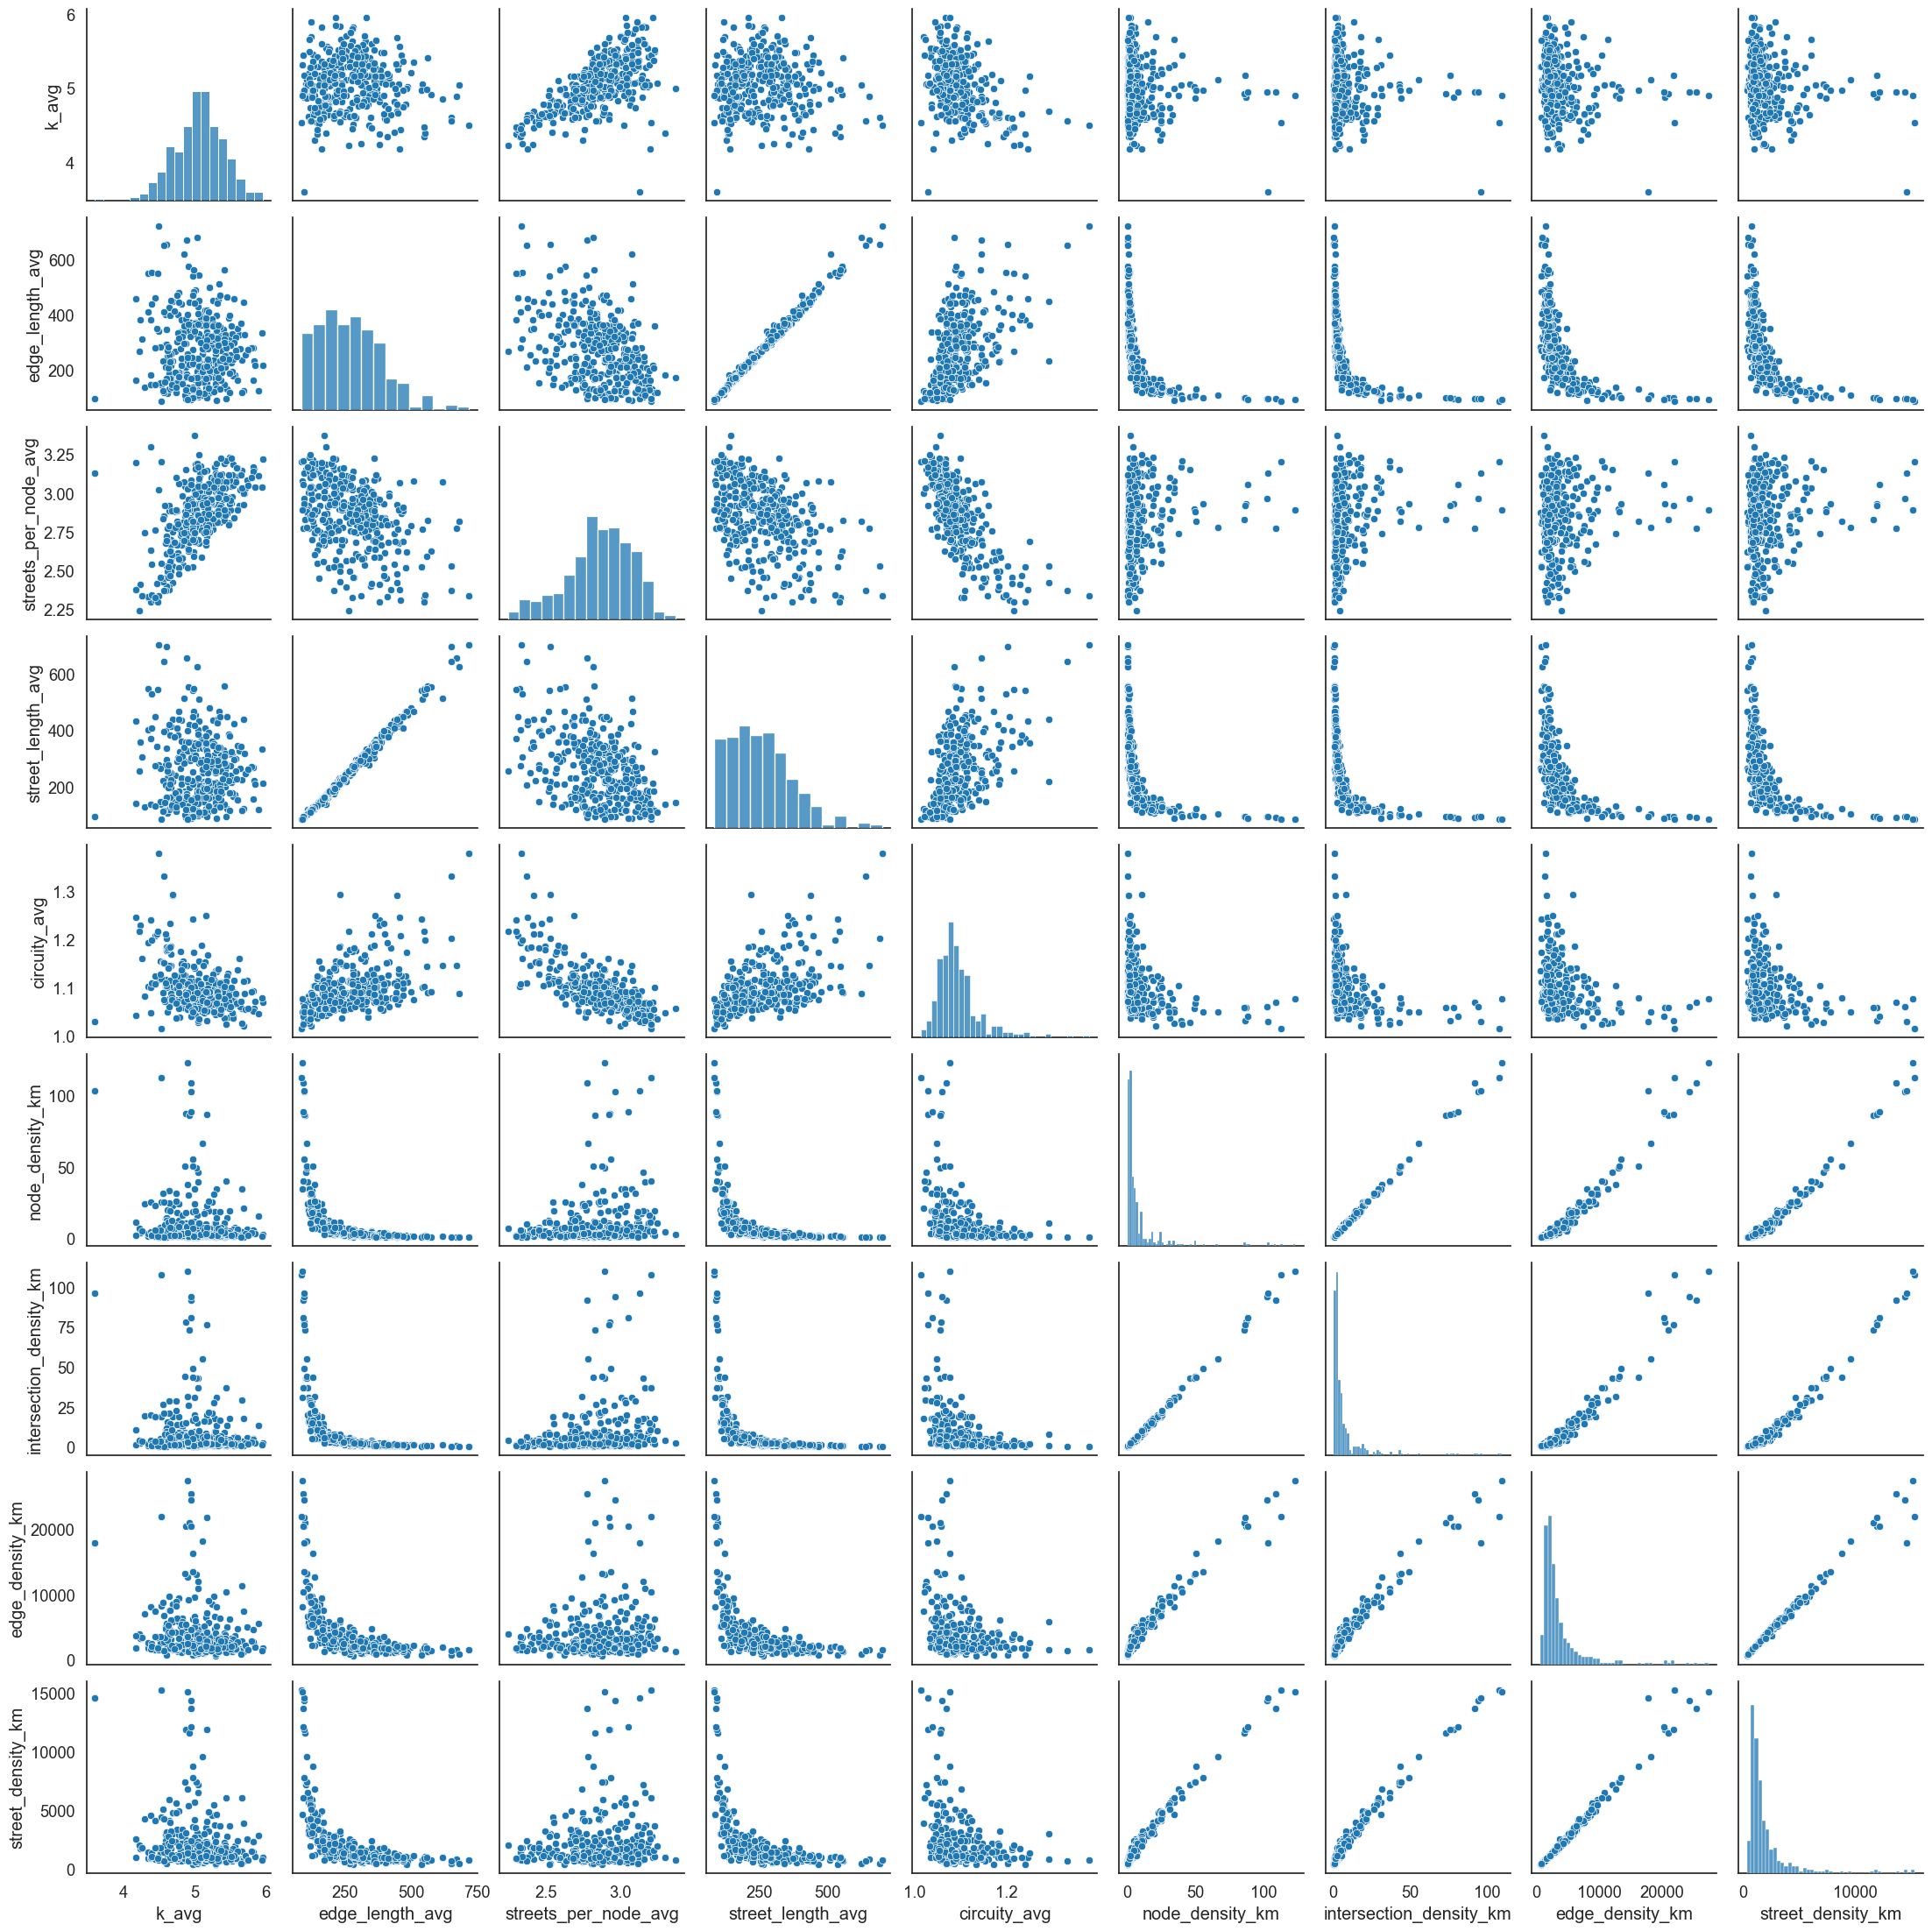

In [328]:
sns.set_context('notebook', font_scale=1.2)
sns.set_style('white')
sns.pairplot(df)

In [329]:
df.dtypes

Cidade                      object
k_avg                      float64
edge_length_avg            float64
streets_per_node_avg       float64
street_length_avg          float64
circuity_avg               float64
node_density_km            float64
intersection_density_km    float64
edge_density_km            float64
street_density_km          float64
dtype: object

In [6]:
numeric_cols = ['k_avg', 
                'edge_length_avg', 
                'streets_per_node_avg', 
                'street_length_avg',
                'circuity_avg', 
                'node_density_km', 
                'intersection_density_km', 
                'edge_density_km', 
                'street_density_km']

city_names = 'Cidade'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

X_scaled.head()

,k_avg,edge_length_avg,streets_per_node_avg,street_length_avg,circuity_avg,node_density_km,intersection_density_km,edge_density_km,street_density_km
0,0.005692,-0.473339,-0.270388,-0.477921,1.241420,-0.316739,-0.316564,-0.402895,-0.407749
1,-0.690945,-0.904976,-0.703144,-0.913986,0.941887,0.373843,0.313385,0.658613,0.527542
2,-0.965237,-0.040027,0.104495,-0.152890,-0.426787,-0.368124,-0.357636,-0.456474,-0.423547
3,0.674491,-0.382990,0.711202,-0.377290,0.045476,-0.340746,-0.323366,-0.409637,-0.388484
4,-1.347259,0.158835,-0.802002,0.172488,0.154439,-0.307948,-0.311561,-0.245298,-0.219782


In [28]:
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=10)
#tsne_2d = PCA(n_components=2, random_state=10) 
#tsne_2d = KernelPCA(n_components=2, kernel="rbf", gamma=0.2, fit_inverse_transform=True, alpha=0.1, random_state=10) 

X_tsne_2d = tsne_2d.fit_transform(X_scaled)

c:\users\pichau\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\pichau\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [18]:
sns.set_style("whitegrid")
sns.set_context("talk")

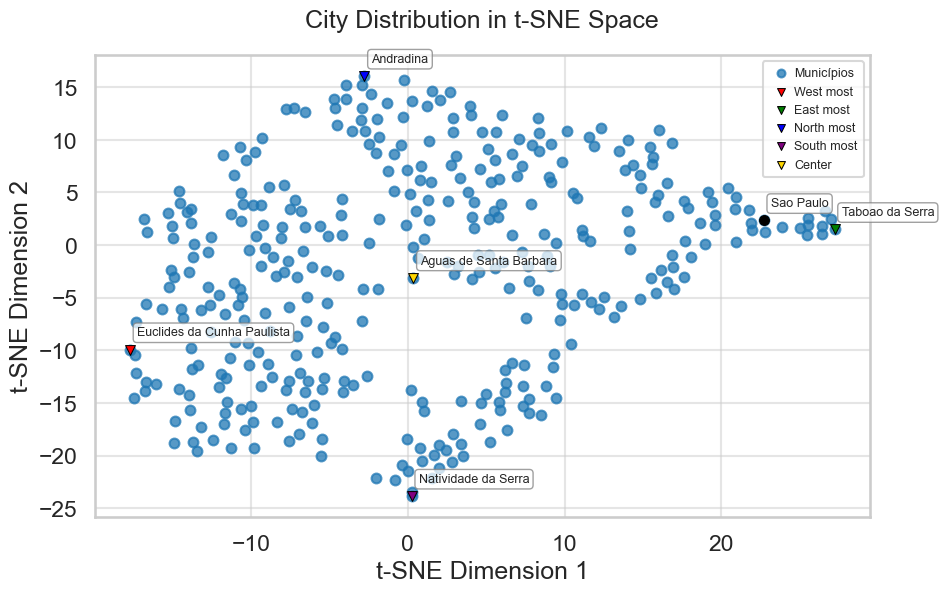

In [24]:
plt.figure(figsize=(10, 6))

# Basic scatter plot of all points
plt.scatter(
    X_tsne_2d[:, 0], X_tsne_2d[:, 1], alpha=0.75, s=50,
    label='Municípios'
)

city = 'Sao Paulo'
sp_idx = df[df['Cidade'] == city].index[0]
sp_coords = X_tsne_2d[sp_idx]

lmost_idx = np.argmin(X_tsne_2d[:, 0])
lmost_city = df.loc[lmost_idx, 'Cidade']

rmost_idx = np.argmax(X_tsne_2d[:, 0])
rmost_city = df.loc[rmost_idx, 'Cidade']

bmost_idx = np.argmin(X_tsne_2d[:, 1])
bmost_city = df.loc[bmost_idx, 'Cidade']

tmost_idx = np.argmax(X_tsne_2d[:, 1])
tmost_city = df.loc[tmost_idx, 'Cidade']

centroid = np.mean(X_tsne_2d, axis=0)
distances = np.linalg.norm(X_tsne_2d - centroid, axis=1)
center_idx = np.argmin(distances)
center_city = df.loc[center_idx, 'Cidade']

# Highlight special points
highlight_points = [
    (sp_coords, 'black', 'o', '', city),
    (X_tsne_2d[lmost_idx], 'red', 'v', 'West most', lmost_city),
    (X_tsne_2d[rmost_idx], 'green', 'v', 'East most', rmost_city),
    (X_tsne_2d[tmost_idx], 'blue', 'v', 'North most', tmost_city),
    (X_tsne_2d[bmost_idx], 'purple', 'v', 'South most', bmost_city),
    (X_tsne_2d[center_idx],'gold', 'v', 'Center', center_city)
]

for coords, color, marker, label, city in highlight_points:
    plt.scatter(
        coords[0], coords[1],
        c=color, s=50, marker=marker,
        ec='black',
        lw=0.75,
        label=label
    )
    
    # Add text annotation
    plt.annotate(
        city, coords,
        xytext=(5, 10), textcoords='offset points',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1, alpha=0.75),
        fontsize=9
    )

# Add plot decorations
plt.title("City Distribution in t-SNE Space", pad=20)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.legend(
    bbox_to_anchor=(1, 1),  # Position (x, y) relative to axes
    fontsize=9,                   # Smaller text
    markerscale=0.8,              # Smaller legend markers
    framealpha=0.75,               # Slight transparency
    borderpad=0.5,                # Less padding inside border
    handletextpad=0             # Less space between marker and text
)

plt.grid(True, alpha=0.5)

plt.show()

In [29]:
from sklearn.manifold import trustworthiness
trust = trustworthiness(X_scaled, X_tsne_2d, n_neighbors=10)
print("Trustworthiness score:", trust)  # >0.9 is excellent

Trustworthiness score: 0.9823929699258097


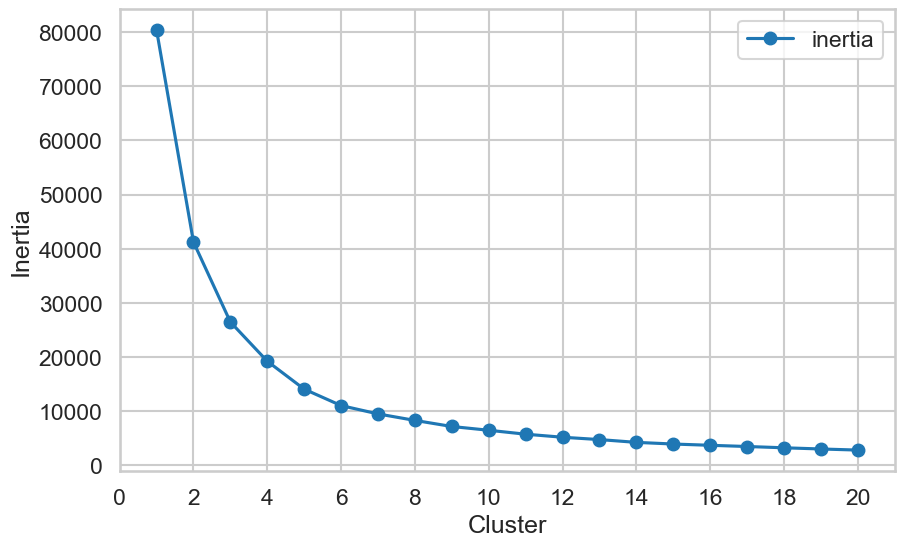

In [351]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=10)
    km = km.fit(X_tsne_2d)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))
    
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [352]:
kmeans = KMeans(n_clusters=5, random_state=10)
clusters = kmeans.fit_predict(X_tsne_2d)

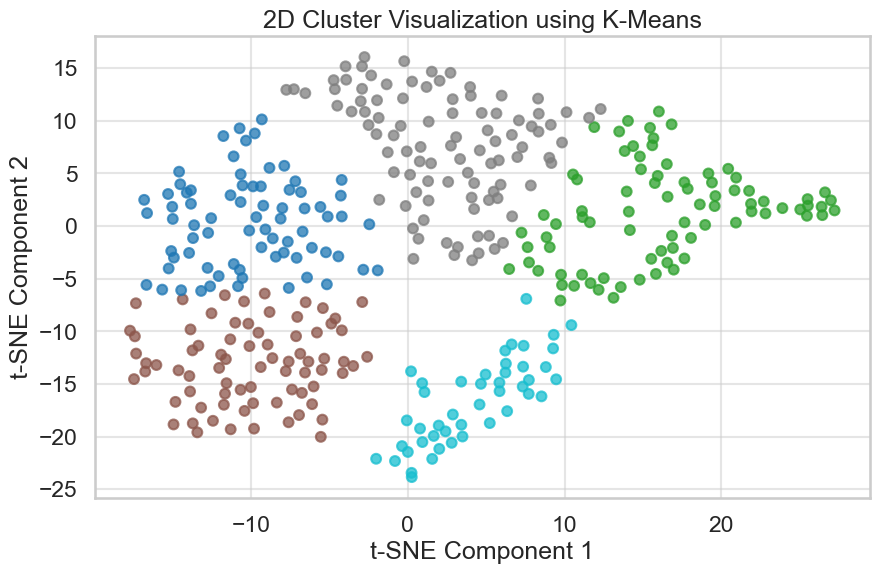

In [353]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_tsne_2d[:, 0], X_tsne_2d[:, 1], 
    c=clusters, cmap="tab10", alpha=0.75, s=50
)

plt.title("2D Cluster Visualization using K-Means")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, alpha=0.5)
plt.show()

In [354]:
params = [
    {"eps": 3, "min_samples": 10},
    {"eps": 0.5, "min_samples": 5},
    {"eps": 1, "min_samples": 50}
]

for param in params:
    db = DBSCAN(**param)
    db.fit(X_tsne_2d)
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    n_noise = (db.labels_ == -1).sum()
    print(f"Params: {param} → Clusters: {n_clusters}, Noise: {n_noise}")


Params: {'eps': 3, 'min_samples': 10} → Clusters: 5, Noise: 20
Params: {'eps': 0.5, 'min_samples': 5} → Clusters: 0, Noise: 371
Params: {'eps': 1, 'min_samples': 50} → Clusters: 0, Noise: 371


In [355]:
db = DBSCAN(eps=3, min_samples=10)
db = db.fit(X_tsne_2d)
dbclusters = db.labels_
db_n_clusters = len(set(db.labels_) - set([-1]))
db_n_noise = (db.labels_ == -1).sum()
print(f'DBSCAN found {db_n_clusters} clusters and {db_n_noise} points of noise.')

DBSCAN found 5 clusters and 20 points of noise.


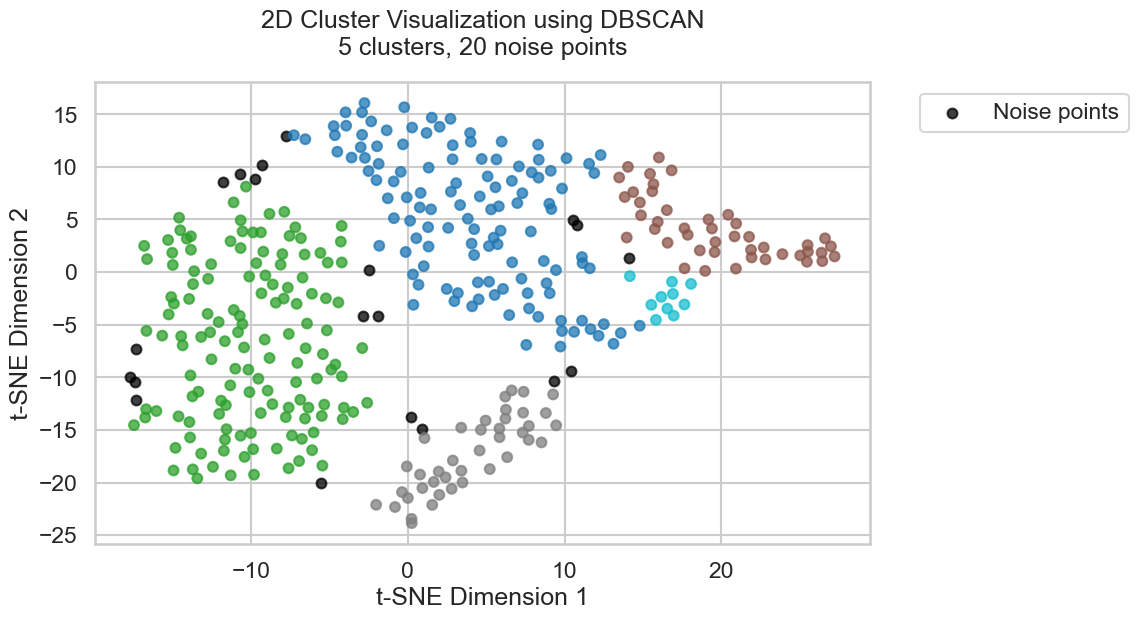

In [356]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot noise points first (grey)
noise_mask = dbclusters == -1
if any(noise_mask):
    plt.scatter(X_tsne_2d[noise_mask, 0], X_tsne_2d[noise_mask, 1],
                c='black', alpha=0.75, s=50, label='Noise points')

# Plot clustered points
cluster_mask = dbclusters != -1
scatter = plt.scatter(
    X_tsne_2d[cluster_mask, 0], X_tsne_2d[cluster_mask, 1],
    c=dbclusters[cluster_mask], cmap="tab10", alpha=0.75, s=50
)

# Add legend and colorbar
plt.title(f"2D Cluster Visualization using DBSCAN\n{db_n_clusters} clusters, {db_n_noise} noise points", pad=20)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [133]:
agg = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
agg = agg.fit_predict(X_tsne_2d)

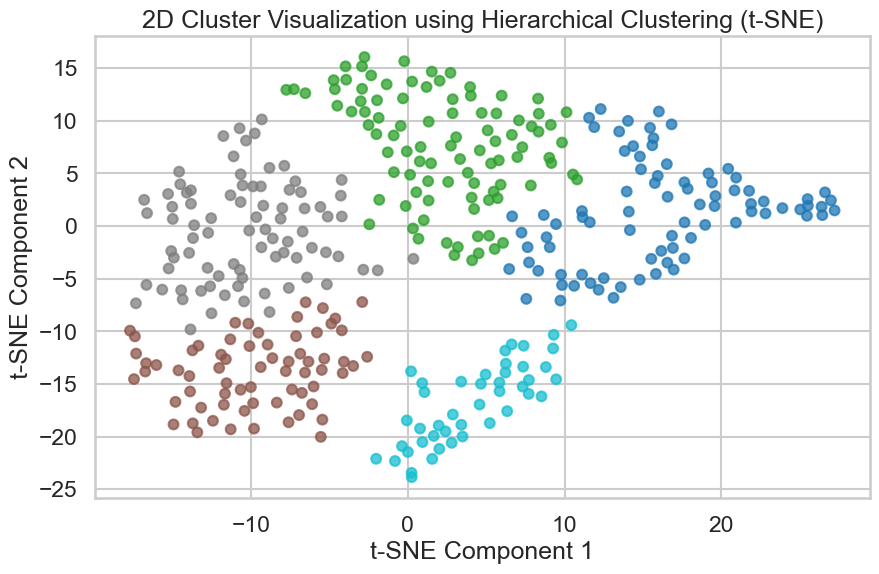

In [282]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_tsne_2d[:, 0], X_tsne_2d[:, 1], 
    c=agg, cmap="tab10", alpha=0.75, s=50
)


plt.title("2D Cluster Visualization using Hierarchical Clustering (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

In [299]:
ms = MeanShift(bandwidth=9)
ms = ms.fit_predict(X_tsne_2d)

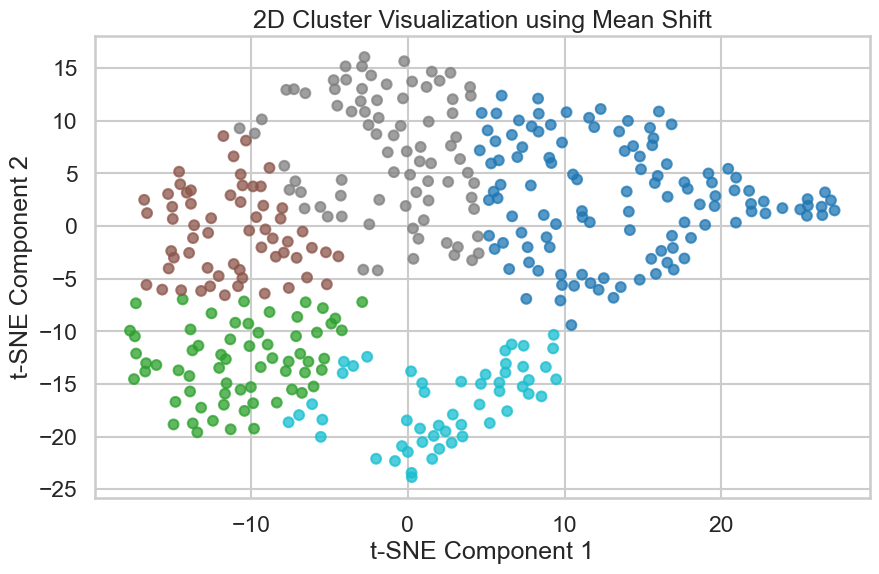

In [300]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_tsne_2d[:, 0], X_tsne_2d[:, 1], 
    c=ms, cmap="tab10", alpha=0.75, s=50
)


plt.title("2D Cluster Visualization using Mean Shift")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()